In [15]:
import numpy as np

gw_mcts_explore = list(np.loadtxt('data/gw_output_allExplorationTermHistory.txt', delimiter='], ', dtype = str))
gw_mcts_explore_list = list(map(lambda x: list(map(float, x.replace("[", "").replace("]", "").split(", "))), gw_mcts_explore))

gw_mcts_rewards = list(np.loadtxt('data/gw_output_allRewardsHistory.txt', delimiter='], ', dtype = str))
gw_mcts_rewards_list = list(map(lambda x: list(map(
    float, x.replace("[", "").replace("]", "").split(", "))), gw_mcts_rewards))

gw_mcts_actions_list = list(map(lambda x: list( x.replace("[", "").replace("]", "").split(", ")), list(np.loadtxt('data/gw_output_allActions.txt', delimiter='], ', dtype = str))))

gw_mcts_n = list(np.loadtxt('data/gw_output_childNCount.txt', delimiter='], ', dtype = str))
gw_mcts_n_list = list(map(lambda x: list(map(float, x.replace("[", "").replace("]", "").split(", "))), gw_mcts_n))

gw_mcts_optimal_list = list(np.loadtxt('data/gw_output_optimalActionId.txt', delimiter=', ', dtype = str))


# scale = lambda x: []
# scale(gw_mcts_explore_data)


In [16]:
action_dict = {"optimal_action": []}
for i in range(len(gw_mcts_actions_list)):
    action_list = gw_mcts_actions_list[i]
    explore_list = gw_mcts_explore_list[i]
    reward_list = gw_mcts_rewards_list[i]
    n_list = gw_mcts_n_list[i]
    
    for a in range(len(action_list)):
        if action_list[a] not in action_dict:
            action_dict[action_list[a]] = {"explore": [], "reward": [], "optimal_action": [], "n": []}
        action_dict[action_list[a]]["explore"].append(explore_list[a])
        action_dict[action_list[a]]["reward"].append(reward_list[a])
        action_dict[action_list[a]]["n"].append(n_list[a])
    action_dict["optimal_action"].append(gw_mcts_optimal_list[i])

    


In [21]:
optimal_action

'↓'

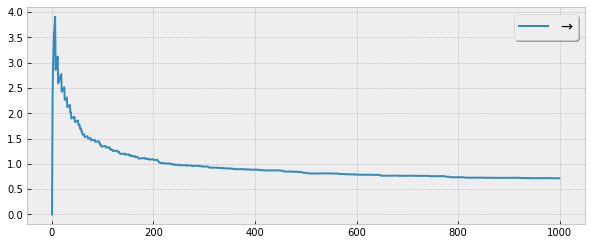

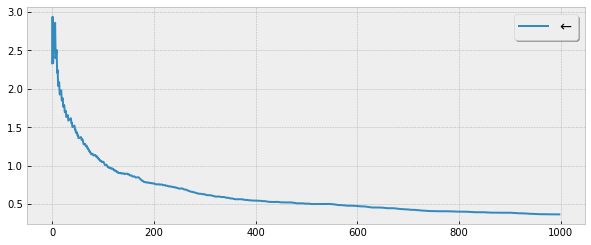

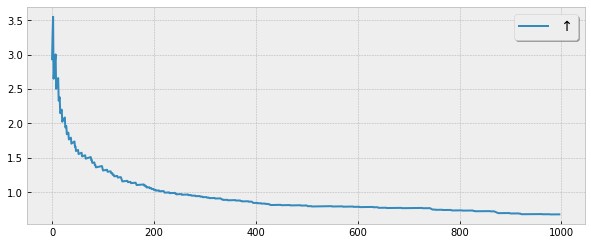

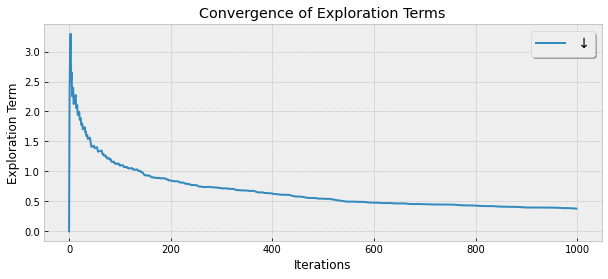

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('bmh')


for action in action_dict.keys():
    if action != "optimal_action" and action_dict["optimal_action"][-1] != action:
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(np.array(action_dict[action]["explore"]), label=action)
        legend = ax.legend(loc='best', shadow=True, fontsize='x-large')


optimal_action = action_dict["optimal_action"][-1]
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.array(action_dict[optimal_action]["explore"]), label=optimal_action)

plt.title("Convergence of Exploration Terms")
plt.ylabel('Exploration Term')
plt.xlabel('Iterations')
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')


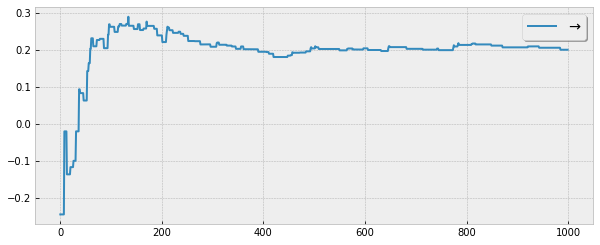

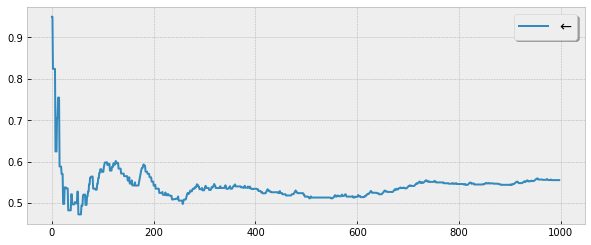

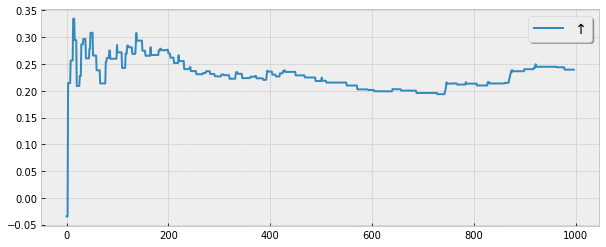

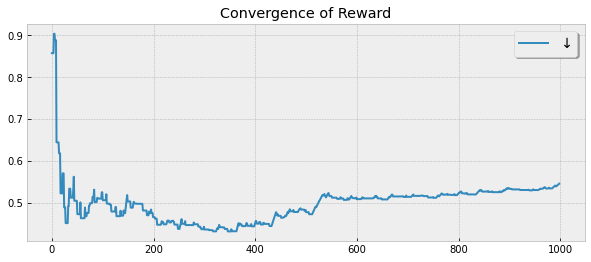

In [19]:
# This minimization is based on min UCT, in gridworld it is possible for this jump to another minimized UCT, but overall the games converge.
from matplotlib.pyplot import figure

plt.style.use('bmh')

for action in action_dict.keys():
    if action != "optimal_action" and action_dict["optimal_action"][-1] != action:
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(np.array(action_dict[action]["reward"]), label=action)
        legend = ax.legend(loc='best', shadow=True, fontsize='x-large')


optimal_action = action_dict["optimal_action"][-1]
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.array(action_dict[optimal_action]["reward"]), label=optimal_action)

plt.title("Convergence of Reward")
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')

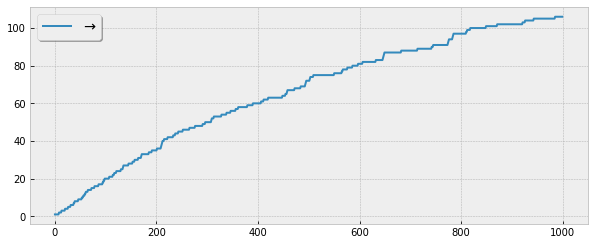

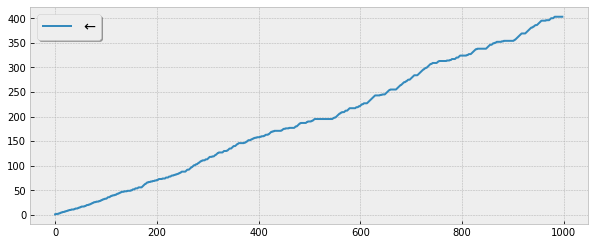

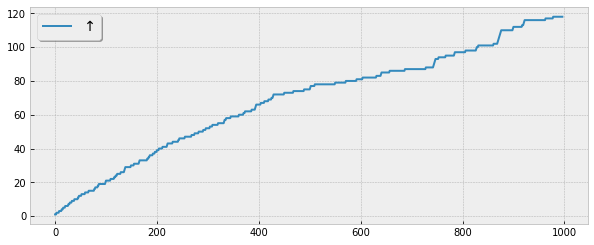

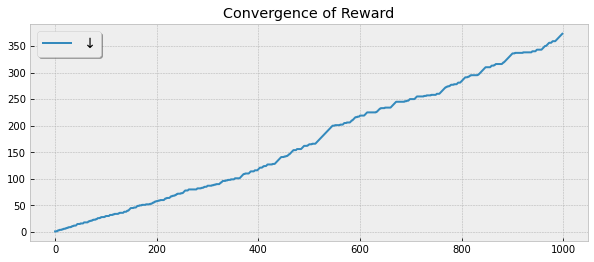

In [20]:
# This minimization is based on min UCT, in gridworld it is possible for this jump to another minimized UCT, but overall the games converge.
from matplotlib.pyplot import figure

plt.style.use('bmh')

for action in action_dict.keys():
    if action != "optimal_action" and action_dict["optimal_action"][-1] != action:
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(np.array(action_dict[action]["n"]), label=action)
        legend = ax.legend(loc='best', shadow=True, fontsize='x-large')


optimal_action = action_dict["optimal_action"][-1]
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.array(action_dict[optimal_action]["n"]), label=optimal_action)

plt.title("Convergence of Reward")
legend = ax.legend(loc='best', shadow=True, fontsize='x-large')